## Assignment 4 (Data Science Tools and Techniqes, AM609)
## Reg. No: 24-14-20
## Name: Sunandan Sharma
## Course: M.Tech Modelling & Simulation

### Task: Predict the Remaining Useful Life (RUL) of bearings, expressed in either minutes or seconds, using the provided test dataset.

##### Step 1: Installing Prerequisites

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

scaler = StandardScaler()
pca = PCA(0.90)

##### Step 2: Fetching the Data & Pre-processing Steps

We use Pandas library to create a Dataframe from the file "Training_set.csv"

In [2]:
Df_train = pd.read_csv('Training_set.csv')
Df_train.head()

,Horz_Mean,Horz_STD,Horz_RMS,Horz_Skewness,Horz_Kurtosis,Horz_Min,Horz_Max,Horz_Peak_to_Peak,Horz_Crest_Factor,Horz_Peak_Freq,...,V_Peak_to_Peak,V_Crest_Factor,V_Peak_Freq,V_Spectral_Centroid,V_Spectral_Bandwidth,V_Spectral_Flatness,V_psd_mean,V_psd_max,V_psd_std,RUL
0,0.006846,0.041343,0.041906,2.191051,23.433744,-0.066333,0.552000,0.618333,13.172274,60,...,0.381143,4.750568,60,4189.074480,3430.543085,0.752072,6.220000e-09,4.510000e-07,4.290000e-08,28020
1,0.007856,0.034397,0.035283,1.056641,2.241458,-0.151000,0.192222,0.343222,5.448033,60,...,0.230200,10.786643,60,4925.094975,4227.947561,0.719271,5.840000e-09,4.240000e-07,4.000000e-08,28010
2,0.007439,0.028797,0.029742,1.434906,3.311133,-0.165000,0.207000,0.372000,6.959873,60,...,0.709832,1.041559,60,4635.223351,3996.632693,0.831306,4.340000e-09,2.470000e-07,2.540000e-08,28000
3,-0.003073,0.020044,0.020279,-0.862384,7.418210,-0.196000,0.109706,0.305706,5.409901,30,...,0.627000,23.874435,60,6015.829165,3952.763577,0.914027,3.300000e-09,1.570000e-07,1.820000e-08,27990
4,-0.009301,0.045706,0.046643,-1.710917,9.050504,-0.527000,0.100833,0.627833,2.161826,60,...,0.602000,10.454038,0,4793.484010,4108.826438,0.777218,7.610000e-09,5.710000e-07,5.360000e-08,27980


In the following steps we do outlier detection using Z-score method to remove rows which contains values which are $3\sigma$ away from their respective variable mean

In [3]:
z_scores = np.abs((Df_train - Df_train.mean())/Df_train.std()) # Outlier Detection
Df_train_no_outlier_copy = Df_train[(z_scores < 3).all(axis=1)] # Outlier Removal

Following code block shows the amount of data removed by the above mentioned Outlier detection and removal method

In [4]:
removed_data_percentage = ((len(Df_train)-len(Df_train_no_outlier_copy))/len(Df_train))*100
print("The Percentage of rows removed after the outlier detection and removal process is (%):", removed_data_percentage)

The Percentage of rows removed after the outlier detection and removal process is (%): 8.890156453715775


The Feature vector of Training Data Set

In [5]:
X_Df_train = Df_train.drop(columns=["RUL"]) # Feature Vector of Original training data
X_Df_train_no_outlier_copy = Df_train_no_outlier_copy.drop(columns=["RUL"]) # Feature Vector of after removing outliers 

The Target vector of Training Data Set

In [6]:
Y_Df_train = Df_train["RUL"] # Target Vector of Original training data
Y_Df_train_no_outlier_copy = Df_train_no_outlier_copy["RUL"] # Target Vector of after removing outliers

We use Pandas library to create a Dataframe from the file "Testing_set.csv"

In [7]:
Df_test  = pd.read_csv('Testing_set.csv')

The Feature vector of Test Data Set

In [8]:
X_Df_test = Df_test.drop(columns=["RUL"])

The Target vector of Test Data Set

In [9]:
Y_Df_test = Df_test["RUL"]

##### Step 3: Explatory Data Analysis, Model Creation and Evaluation

###### Step 3.1: Explanatory Data Analysis of original training data

First we draw the Correlogram of the feature variables in the training set (Original Data with outliers present) and visualized it as a heatmap below

<Axes: >

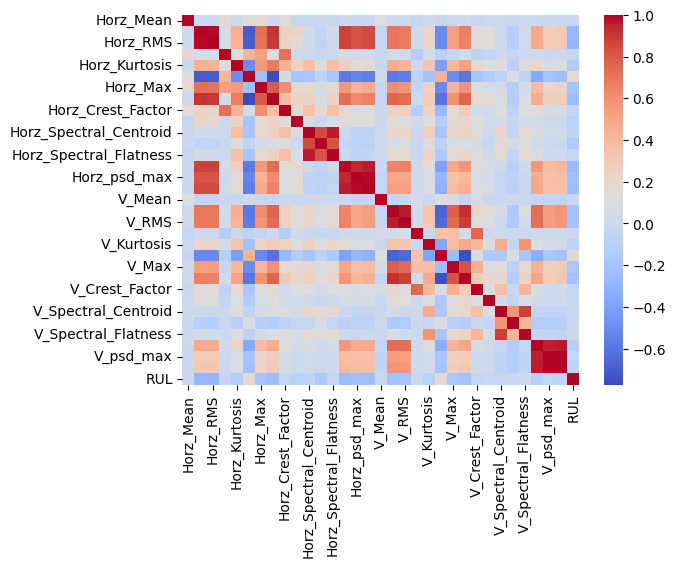

In [10]:
corr_matrix_original = Df_train.corr()
sns.heatmap(corr_matrix_original,annot=False,cmap='coolwarm')

We observe that in the above correlogram many features have high correlations between each other will result in multi-collinearity issues giving bad predictions result.

##### Model 1A:

We implement a multiple linear regression based on the standardized feature values. The following code block is the implementation of it.

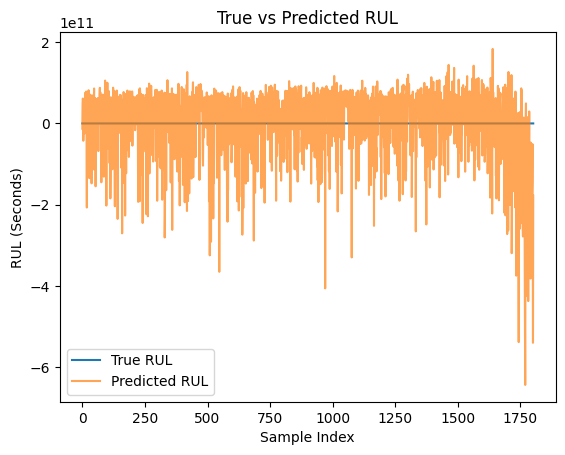

In [11]:
model = LinearRegression()

poly = PolynomialFeatures(degree=1)

X_poly_train = poly.fit_transform(scaler.fit_transform(X_Df_train_no_outlier_copy))
X_poly_test = poly.fit_transform(scaler.fit_transform(X_Df_test))

model.fit(X_poly_train,Y_Df_train_no_outlier_copy)

predictions_original_data = model.predict(X_poly_test)

plt.plot(Y_Df_test,label="True RUL")
plt.plot(predictions_original_data, label="Predicted RUL",alpha=0.7)
plt.xlabel("Sample Index")
plt.ylabel("RUL (Seconds)")
plt.title("True vs Predicted RUL")
plt.legend()

The following code block shows the metrics to ascertain the performance of the model. We can readily see the very poor performance. 

In [12]:
# Calculate MAE, MSE, RMSE, and R²
mae = mean_absolute_error(Y_Df_test, predictions_original_data)
mse = mean_squared_error(Y_Df_test, predictions_original_data)
rmse = mean_squared_error(Y_Df_test, predictions_original_data, squared=False)
r2 = r2_score(Y_Df_test, predictions_original_data)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 65025189839.60473
MSE: 7.72584965636285e+21
RMSE: 87896812549.50517
R²: -285507853609256.56


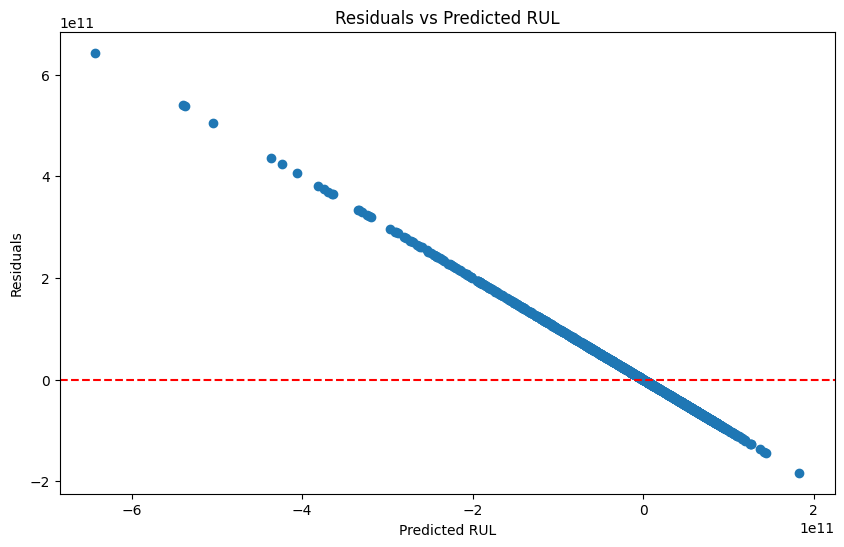

In [13]:
# Plot residuals
residuals = Y_Df_test - predictions_original_data
plt.figure(figsize=(10, 6))
plt.scatter(predictions_original_data, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted RUL")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted RUL")
plt.show()

###### Step 3.2: Explanatory Data Analysis of original training data with outliers removed

First we draw the Correlogram of the feature variables in the training set (Original Data with outliers absent) and visualized it as a heatmap below. We can readily observe that some higher correlation between features has reduced due to the process but there still exist high correlation between other features.

<Axes: >

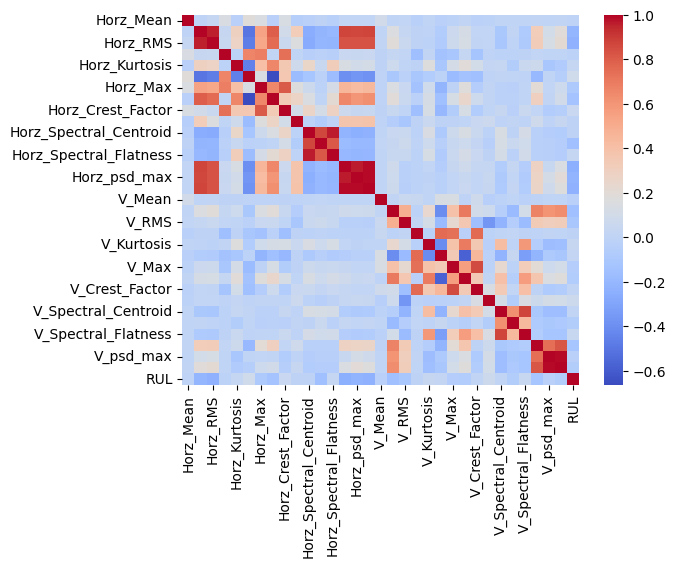

In [14]:
corr_matrix_outlier_removed = Df_train_no_outlier_copy.corr()
sns.heatmap(corr_matrix_outlier_removed,annot=False,cmap='coolwarm')

##### Model 1B:

In this instance before application of any model we do two operations and after the model implemention we apply one more operation to finally get the result.

The Pre-Processing steps are:

- We remove the outliers using Z score method (The threshold we chose is $3\sigma$)
- We utilize PCA (Principal component Analysis) to the training and testing data set features (The PCA value threshold we considered is $0.9$). Application of PCA gives us two advantages. Firstly it transforms the original feature space such that there is no multi-collinearity issues like before. Secondly by applying the threshold we can reduce the feature space reducing computation time.

After the preprocessing step we apply the same regression model as before (a multiple linear regression model) on the PCA transformed training data and applied the model on PCA transformed test data features to get the predicted value.

Finally in the last step of the prediction we converted any negative value predicted by the model as 0 because the target "RUL" is time and it cann't be negative. This is an application of domain knowledge which can improve the final model accuracy.

Here we applied the PCA transform

In [15]:
poly = PolynomialFeatures(degree=1)
X_tr = poly.fit_transform(scaler.fit_transform(X_Df_train_no_outlier_copy))
X_tst = poly.fit_transform(scaler.fit_transform(X_Df_test))

pca.fit(X_tr)

x_train = pca.transform(X_tr)
x_test = pca.transform(X_tst)

x_train_pca = pd.DataFrame(x_train)

We find the correlogram of the PCA transformed feature space. We can see two observations. The correlations between two different features has gone to zero also due to the choice of the threshold the feature space has substantially reduced.

<Axes: >

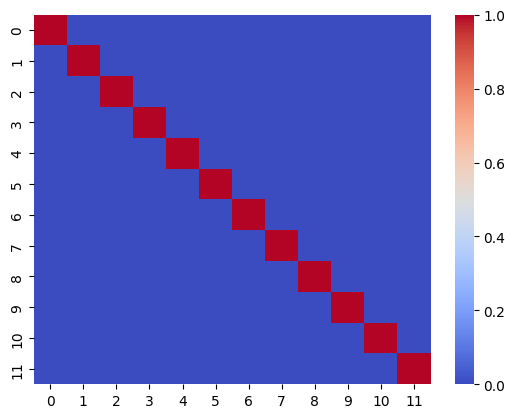

In [16]:
corr_matrix_x_train_pca = x_train_pca.corr()
sns.heatmap(corr_matrix_x_train_pca,annot=False,cmap='coolwarm')

Here we apply the multiple linear regression on the PCA transformed training data to predict the target in test data. Both the training and target features have been PCA transformed.

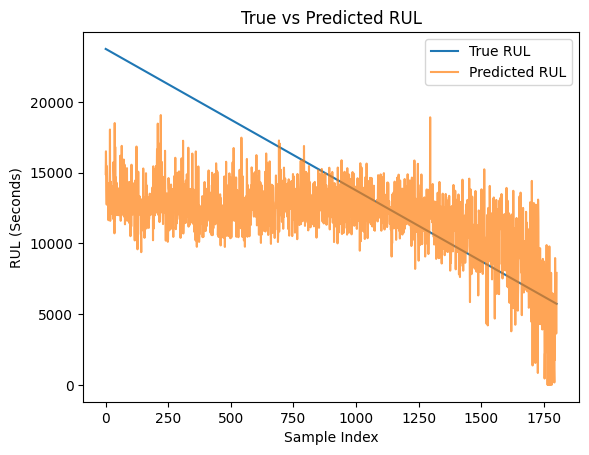

In [17]:
model = LinearRegression()

poly = PolynomialFeatures(degree=1)
X_poly_train = poly.fit_transform(x_train_pca)
X_poly_test = poly.fit_transform(x_test)

model.fit(X_poly_train,Y_Df_train_no_outlier_copy)

predictions_pca = model.predict(X_poly_test)

predictions_pca[predictions_pca<0] = 0 #Here we apply the domain knowledge that "RUL" can't be negative

plt.plot(Y_Df_test,label="True RUL")
plt.plot(predictions_pca,label="Predicted RUL",alpha=0.7)
plt.xlabel("Sample Index")
plt.ylabel("RUL (Seconds)")
plt.title("True vs Predicted RUL")
plt.legend()

Here we can see substantial improvement in the prediction of the model. We still have negative $R^{2}$ value but the error metrics value are definitely much less than the naive linear regression model.

In [18]:
# Calculate MAE, MSE, RMSE, and R²
mae = mean_absolute_error(Y_Df_test, predictions_pca)
mse = mean_squared_error(Y_Df_test, predictions_pca)
rmse = mean_squared_error(Y_Df_test, predictions_pca, squared=False)
r2 = r2_score(Y_Df_test, predictions_pca)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 4068.3617472047135
MSE: 27098492.30056159
RMSE: 5205.621221387663
R²: -0.001421554509339451


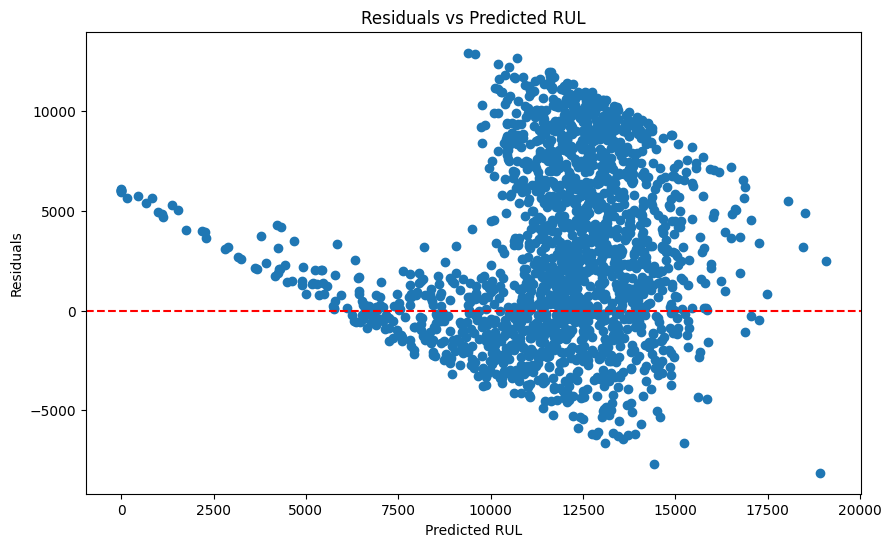

In [19]:
# Plot residuals
residuals = Y_Df_test - predictions_pca
plt.figure(figsize=(10, 6))
plt.scatter(predictions_pca, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted RUL")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted RUL")
plt.show()

##### Model 2:

In this instance before application of any model we do two operations and after the model implemention we apply one more operation to finally get the result.(These are similar to as the model 1B)

The Pre-Processing steps are:

- We remove the outliers using Z score method (The threshold we chose is $3\sigma$)
- We utilize PCA (Principal component Analysis) to the training and testing data set features (The PCA value threshold we considered is $0.9$). Application of PCA gives us two advantages. Firstly it transforms the original feature space such that there is no multi-collinearity issues like before. Secondly by applying the threshold we can reduce the feature space reducing computation time.

After the preprocessing step we apply the same regression model as before (a multiple linear regression model) on the PCA transformed training data and applied the model on PCA transformed test data features to get the predicted value.

Finally in the last step of the prediction we converted any negative value predicted by the model as 0 because the target "RUL" is time and it cann't be negative. This is an application of domain knowledge which can improve the final model accuracy.

Here we take the following model,

$$Y_{t} = \sum_{i=1}^{20} \alpha_{i}Y_{t - i} + \sum_{j=1}^{33} \beta_{j}x_{j} +\epsilon_{t}$$

where,
$$\epsilon_{t} \sim \mathcal{N}(0,\sigma^2)$$

This belongs to the family of Auto-regressive model. We create lagged features column and then apply same procedure as before. 

In [20]:
# Adding lag features to the DataFrame
for i in range(1, 21): # Creating lag features up to 5 days
    Df_train_no_outlier_copy[f'Lag_{i}'] = Df_train_no_outlier_copy['RUL'].shift(i)
    Df_test[f'Lag_{i}'] = Df_test['RUL'].shift(i)

# Drop rows with NaN values resulting from creating lag features
Df_train_no_outlier_copy.dropna(inplace=True)
Df_test.dropna(inplace=True)

X_Df_train_no_outlier_copy = Df_train_no_outlier_copy.drop(columns=["RUL"])
X_Df_test = Df_test.drop(columns=["RUL"])

Y_Df_train_no_outlier_copy = Df_train_no_outlier_copy["RUL"]
Y_Df_train_no_outlier_copy = Df_train_no_outlier_copy["RUL"]
Y_Df_test = Df_test["RUL"]


<Axes: >

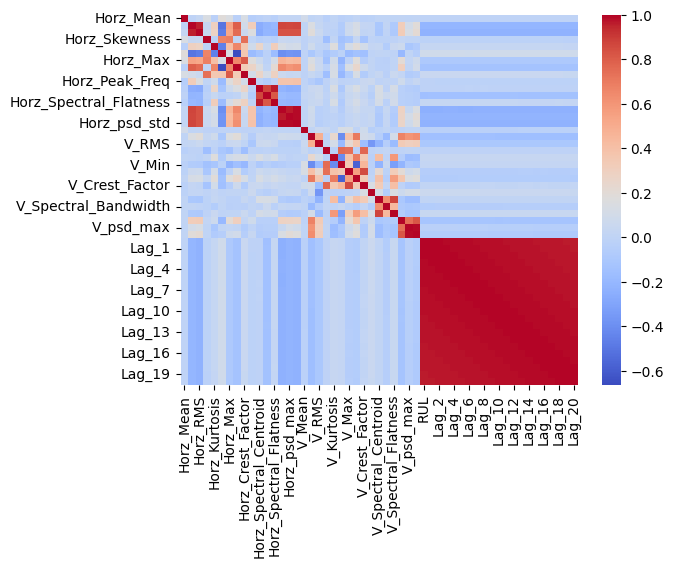

In [21]:
corr_matrix_original = Df_train_no_outlier_copy.corr()
sns.heatmap(corr_matrix_original,annot=False,cmap='coolwarm')

The correlogram of the training data after adding lagged features. We can see very high auto-correlation in target variable. The reason for such high auto-correlation needs to be further investigated before making any conclusion (The auto-correlation may be a genuine feature or just an artifact due to some sort of sorting of data while creating the dataset. The assumption of independence between two samples here is clearly violated)

In [22]:
poly = PolynomialFeatures(degree=1)
X_tr = poly.fit_transform(scaler.fit_transform(X_Df_train_no_outlier_copy))
X_tst = poly.fit_transform(scaler.fit_transform(X_Df_test))
pca.fit(X_tr)

x_train = pca.transform(X_tr)
x_test = pca.transform(X_tst)
x_train_pca = pd.DataFrame(x_train)

<Axes: >

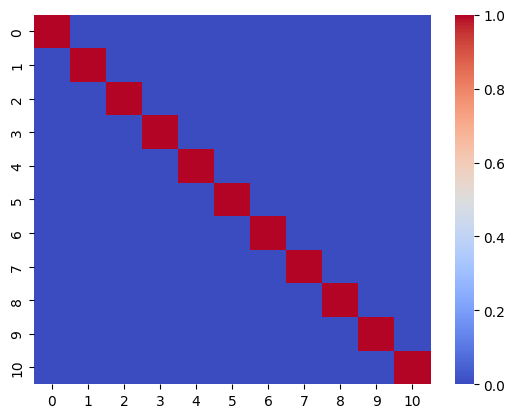

In [23]:
corr_matrix_x_train_pca = x_train_pca.corr()
sns.heatmap(corr_matrix_x_train_pca,annot=False,cmap='coolwarm')

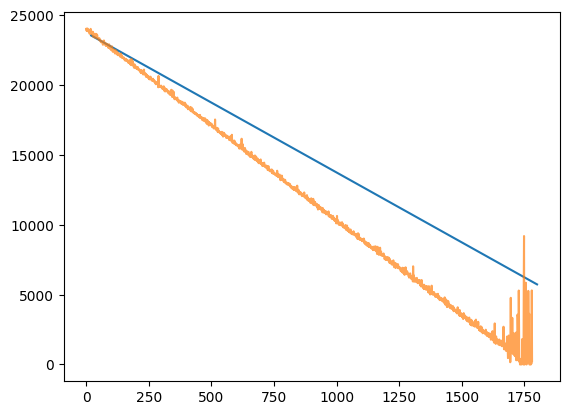

In [24]:
model = LinearRegression()

poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(x_train_pca)

X_poly_test = poly.fit_transform(x_test)

model.fit(X_poly_train,Y_Df_train_no_outlier_copy)

predictions_ar_pca = model.predict(X_poly_test)

predictions_ar_pca[predictions_ar_pca<0] = 0

plt.plot(Y_Df_test)
plt.plot(predictions_ar_pca,alpha=0.7)

Here we observe that $R^{2}$ is positive for test data. So we can see the significance of the lagged features. even though the $R^{2}$ value is high we should be conscious about making any conclusions on what it means. Also the dominating effect of lagged features may hide the explainabiity of the independent features.

In [25]:
# Calculate MAE, MSE, RMSE, and R²
mae = mean_absolute_error(Y_Df_test, predictions_ar_pca)
mse = mean_squared_error(Y_Df_test, predictions_ar_pca)
rmse = mean_squared_error(Y_Df_test, predictions_ar_pca, squared=False)
r2 = r2_score(Y_Df_test, predictions_ar_pca)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 2787.500757434955
MSE: 10885865.175312418
RMSE: 3299.3734519318086
R²: 0.5886334877632786


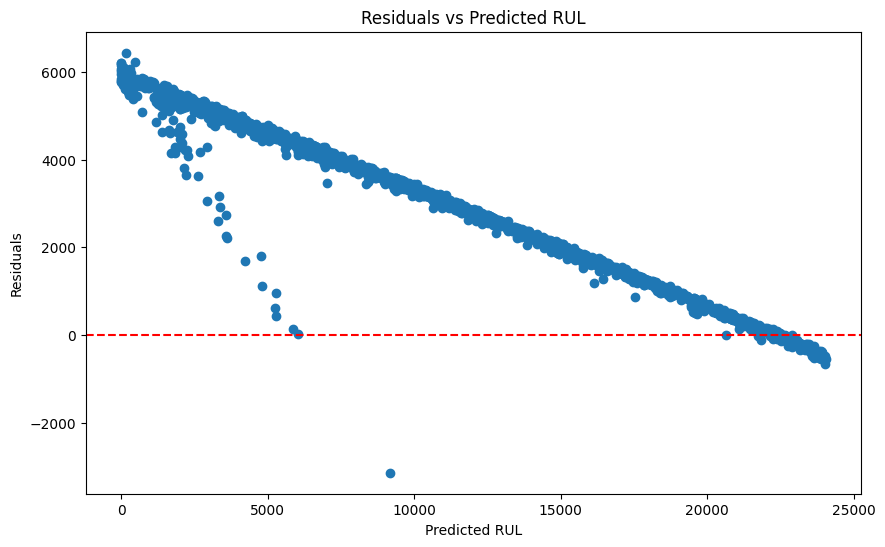

In [26]:
# Plot residuals
residuals = Y_Df_test - predictions_ar_pca
plt.figure(figsize=(10, 6))
plt.scatter(predictions_ar_pca, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted RUL")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted RUL")
plt.show()